# Data Importing

In [3]:
import pandas as pd

df = pd.read_csv("Final_students_data.csv")

df.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,Laila has always been fascinated by the patter...,1
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,A forth-year student at Princess Sumaya Univer...,2
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,Rania entered the University of Jordan's Compu...,0
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,Khaled has a knack for translating data into m...,1
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst,"In her Third year at Petra University, Nour is...",2


In [2]:
df.isnull().sum()

Name                          0
Year                          0
Programming Languages         0
Certifications                0
Project Count                 0
Extracurricular Activities    0
Career Interest               0
Bio                           0
Cluster                       0
dtype: int64

In [4]:
df["Certifications"] = df["Certifications"].astype(str).str.lower().str.strip()
df["Name"] = df["Name"].astype(str).str.lower().str.strip()
df["Programming Languages"] = df["Programming Languages"].astype(str).str.lower().str.strip()
df["Extracurricular Activities"] = df["Extracurricular Activities"].astype(str).str.lower().str.strip()
df["Bio"] = df["Bio"].astype(str).str.lower().str.strip()
df["Project Count"] = df["Project Count"].fillna(0).astype(int)


In [4]:
df["Certifications"].unique()

array(['data science professional certificate (ibm)', 'comptia security+',
       'java programming (oracle)', 'ceh', 'aws certified developer',
       'comptia network+', 'python for data science (coursera)',
       'google data analytics professional', 'ai foundations (coursera)',
       'web development bootcamp (udemy)',
       'data science specialization (coursera)',
       'certified ethical hacker (ceh)',
       'google data analytics certificate',
       'certified information systems security professional (cissp)',
       'network+ certified', 'javascript certification (udemy)',
       'data science foundations (coursera)',
       'data science certification (coursera)',
       'full stack developer certification', 'ai fundamentals (coursera)',
       'oracle java programming certificate',
       'database management certificate',
       'javascript development certificate',
       'comptia security+ certification',
       'data structures and algorithms certification (udemy)

In [10]:
df["Extracurricular Activities"].unique()

array(['ai club mentor', 'cybersecurity competition participant',
       'peer programming tutor', 'volunteer tutor',
       'tech community member', 'student government member',
       'hackathon participant', 'tech conference organizer',
       'ai club volunteer', 'digital security researcher',
       'startup founder', 'research assistant',
       'cybersecurity awareness speaker', 'volunteer developer',
       'data analytics consultant', 'security consultant', 'tech blogger',
       'data science volunteer', 'cybersecurity blog writer',
       'ai research assistant', 'cybersecurity awareness advocate',
       'peer tutor', 'volunteer for cybersecurity workshops',
       'hackathon organizer', 'machine learning club member',
       'tech talk speaker', 'peer mentor', 'ai club member',
       'cybersecurity lab assistant', 'web development mentor',
       'ai project developer', 'data science club member',
       'tech workshop leader', 'tech meetups attendee',
       'security an

In [64]:
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts

Cluster
0    84
1    89
2    84
Name: count, dtype: int64

# TF-IDF

In [5]:
from modules.TfIdf import TfIdf_moh
tf = TfIdf_moh()
tf.vectorizer = tf.vectorizer.set_params(stop_words='english')

queries = []

for query in df["Bio"]:
    queries.append(query)

tf.vectorize(queries)


## Fixed tf

In [61]:
path = "results/tf_results.txt"


queriesTest = [
    "Data Science and AI",
    "AI mentor",
    "Impactful contributions",
    "Data patterns",
    "Sophomore in Data Science"]

results = tf.rank_queries(queriesTest)

with open(path, "w") as file:
    for query, result in results.items():
        file.write(f"query: {query}\n")
        ranked_bios = result.get("rankedIndexes", [])
        scores = result.get("score", [])

        for rank, index in enumerate(ranked_bios[:5], start=1):
            file.write(f"bio {rank}:\n")
            file.write(f"{df['Bio'][index]}\n")
            file.write(f"score: {scores[rank - 1]:.4f}\n")
        file.write("-" * 40 + "\n")

print("done")

done


In [7]:
import importlib
import modules.TfIdf

importlib.reload(modules.TfIdf)
print(dir(modules.TfIdf))


['TfIdf_moh', 'TfidfVectorizer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'cosine_similarity', 'np']


## Dynamic tf

In [9]:
import modules.util
import numpy as np
import importlib
importlib.reload(modules.util)

from modules.util import remove_stop_words, has_words_english, write_ranked_results_m, calculate_dynamic_threshold_m, get_ranked_results_m

path_m = "results/dynamic_tf_results.txt"

query_m = input("Please enter the bio you want to rank: ")
query_m = remove_stop_words(query_m) 
    
if not has_words_english(query_m):
    print("please enter a query with words in English")
        
ranked_bios_m, scores_m = get_ranked_results_m(tf, df, query_m)
    
if len(ranked_bios_m) == 0:
    print("no bios to rank")
    
        
selected_bios_m, selected_scores_m, threshold_m = calculate_dynamic_threshold_m(scores_m, df, ranked_bios_m)
    
    
if threshold_m < 0.01:
    selected_bios_m = np.array([])
    selected_scores_m = np.array([])
    
success_m = write_ranked_results_m(path_m, df, selected_bios_m, selected_scores_m)
    
if success_m:
    print(f"done, results saved to {path_m}")
else:
    print("no related bios found")

no related bios found


## Test

In [10]:
# Entering a number
import modules.util
import numpy as np
import importlib
importlib.reload(modules.util)

from modules.util import remove_stop_words, has_words_english, write_ranked_results_m, calculate_dynamic_threshold_m, get_ranked_results_m

path_m = "results/Tests/dynamic_tf_results_numbers.txt"

query_m = input("Please enter the bio you want to rank: ")
query_m = remove_stop_words(query_m) 
    
if not has_words_english(query_m):
    print("please enter a query with words in English")
        
ranked_bios_m, scores_m = get_ranked_results_m(tf, df, query_m)
    
if len(ranked_bios_m) == 0:
    print("no bios to rank")
    
        
selected_bios_m, selected_scores_m, threshold_m = calculate_dynamic_threshold_m(scores_m, df, ranked_bios_m)
    
    
if threshold_m < 0.01:
    selected_bios_m = np.array([])
    selected_scores_m = np.array([])
    
success_m = write_ranked_results_m(path_m, df, selected_bios_m, selected_scores_m)
    
if success_m:
    print(f"done, results saved to {path_m}")
else:
    print("no related bios found")

please enter a query with words in English
no related bios found


In [14]:
# Entering a non realted Bio (m)
import modules.util
import numpy as np
import importlib
importlib.reload(modules.util)

from modules.util import remove_stop_words, has_words_english, write_ranked_results_m, calculate_dynamic_threshold_m, get_ranked_results_m

path_m = "results/Tests/dynamic_tf_results_nonRelated.txt"

query_m = input("Please enter the bio you want to rank: ")
query_m = remove_stop_words(query_m) 
    
if not has_words_english(query_m):
    print("please enter a query with words in English")
        
ranked_bios_m, scores_m = get_ranked_results_m(tf, df, query_m)
    
if len(ranked_bios_m) == 0:
    print("no bios to rank")
    
        
selected_bios_m, selected_scores_m, threshold_m = calculate_dynamic_threshold_m(scores_m, df, ranked_bios_m)
    
    
if threshold_m < 0.01:
    selected_bios_m = np.array([])
    selected_scores_m = np.array([])
    
success_m = write_ranked_results_m(path_m, df, selected_bios_m, selected_scores_m)
    
if success_m:
    print(f"done, results saved to {path_m}")
else:
    print("no related bios found")

no related bios found


In [13]:
# Entering a Vlaid Bio
'''
As a data science researcher, I build machine learning models to uncover patterns in large datasets. My focus is on NLP and AI-driven solutions for healthcare diagnostics, leveraging Python and PyTorch.
'''
import modules.util
import numpy as np
import importlib
importlib.reload(modules.util)

from modules.util import remove_stop_words, has_words_english, write_ranked_results_m, calculate_dynamic_threshold_m, get_ranked_results_m

path_m = "results/tests/dynamic_tf_results_Valid.txt"

query_m = input("Please enter the bio you want to rank: ")
query_m = remove_stop_words(query_m) 
    
if not has_words_english(query_m):
    print("please enter a query with words in English")
        
ranked_bios_m, scores_m = get_ranked_results_m(tf, df, query_m)
    
if len(ranked_bios_m) == 0:
    print("no bios to rank")
    
        
selected_bios_m, selected_scores_m, threshold_m = calculate_dynamic_threshold_m(scores_m, df, ranked_bios_m)
    
    
if threshold_m < 0.01:
    selected_bios_m = np.array([])
    selected_scores_m = np.array([])
    
success_m = write_ranked_results_m(path_m, df, selected_bios_m, selected_scores_m)
    
if success_m:
    print(f"done, results saved to {path_m}")
else:
    print("no related bios found")

done, results saved to results/tests/dynamic_tf_results_Valid.txt


# Graph

In [15]:
import importlib
import modules.graph
import modules.util

importlib.reload(modules.util)
importlib.reload(modules.graph)

print(dir(modules.util))


['ENGLISH_STOP_WORDS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_dynamic_threshold_m', 'get_languges', 'get_ranked_results_m', 'has_words_english', 'np', 'ranked_bios_m', 're', 'remove_stop_words', 'write_ranked_results_m']


In [16]:
from modules.util import get_languges
from modules.graph import Graph




## initiliza variables 

In [17]:
All_language = set()
All_certificates = set()
cert_student_projects = {}




In [18]:
student_names = df["Name"].to_list()
student_cert = df["Certifications"].to_list()

for name in student_names: 
    student_row = df[df["Name"] == name]
    student_langs = get_languges(student_row["Programming Languages"].iloc[0])
    for lang in student_langs:
        All_language.add(lang.strip())


In [19]:
for cert in df["Certifications"].unique():
    filtered_df = df[df["Certifications"] == cert]

    student_project_counts = dict(zip(filtered_df["Name"], filtered_df["Project Count"]))
    cert_student_projects[cert] = student_project_counts



In [21]:
for cert in df["Certifications"].tolist(): 
    All_certificates.add(cert)

print(len(All_certificates))

156


In [20]:
cert_student_projects

{'data science professional certificate (ibm)': {'laila mansour': 4,
  'khaled abbas': 4,
  'omar mansour': 4,
  'rami zubair': 4},
 'comptia security+': {'omar al-hassan': 5,
  'jad nader': 5,
  'layla sweis': 5,
  'sami jamal': 5,
  'nadine khalil': 5,
  'laila kharma': 5,
  'omar farah': 5,
  'samira nabil': 5},
 'java programming (oracle)': {'rania khoury': 3,
  'sara haddad': 3,
  'rasha fadoul': 3,
  'samir ghazi': 3},
 'ceh': {'nour husseini': 5},
 'aws certified developer': {'mazen jaber': 4},
 'comptia network+': {'amal qassem': 5, 'zeinab qasem': 5},
 'python for data science (coursera)': {'tariq nassar': 3,
  'yara al-majali': 3,
  'mariam zohdi': 3},
 'google data analytics professional': {'lina fakhoury': 4},
 'ai foundations (coursera)': {'hassan al-mansour': 4,
  'omar zayed': 4,
  'hassan akram': 4,
  'samar ibrahim': 4},
 'web development bootcamp (udemy)': {'fatima khalil': 3,
  'maya sayegh': 3,
  'ali al-qudah': 3,
  'basil hamed': 3,
  'mariam faris': 3,
  'iman ja

## for one name

In [10]:
graph = Graph(kind = "Directed")


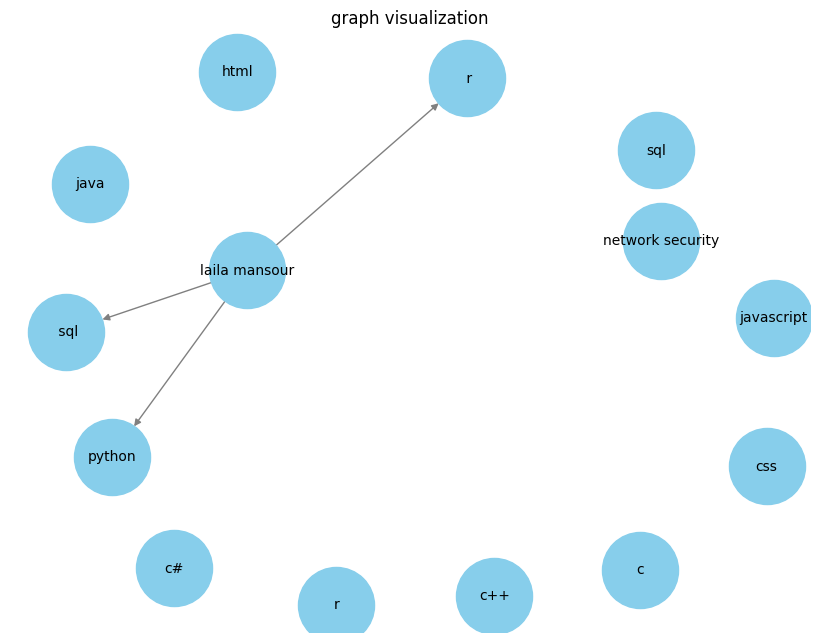

In [15]:
student = "laila mansour"

student_data = df[df["Name"] == student]

student_langs = get_languges(student_data["Programming Languages"].iloc[0])

graph.create_graph(student, student_langs, All_language)

graph.draw_graph()

## Dynamic graph

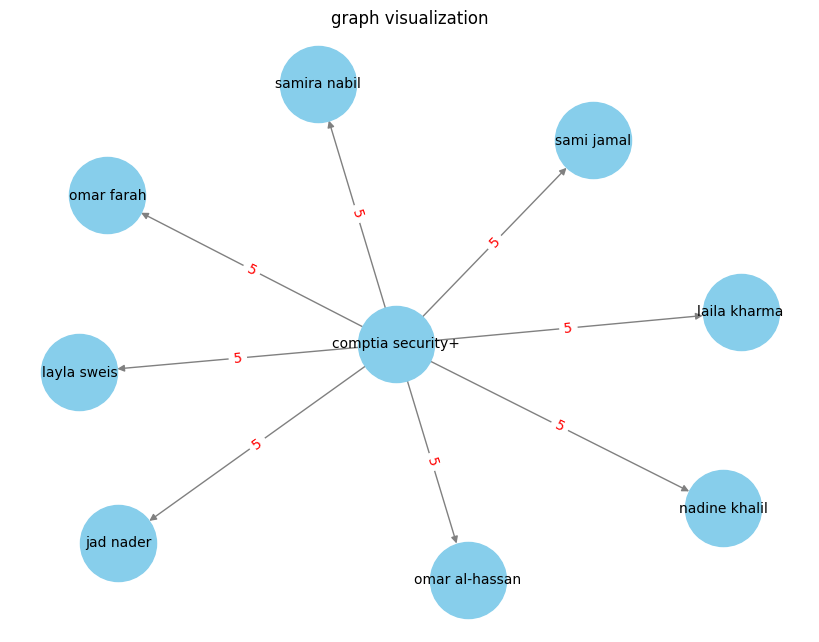

In [ ]:
cert = input("Please enter the certificate: ").lower().strip()
# CompTIA Security+  
if cert in All_certificates: 
        
    di_graph = Graph(kind="Directed")
    di_graph.create_graph_projects(cert, cert_student_projects) 
    di_graph.draw_graph()
else: 
    print("the certification does not exist")

### Tests

In [22]:
cert = input("Please enter the certificate: ").lower().strip()
# GENaI 
if cert in All_certificates: 
        
    di_graph = Graph(kind="Directed")
    di_graph.create_graph_projects(cert, cert_student_projects) 
    di_graph.draw_graph()
else: 
    print("the certification does not exist")

the certification does not exist


# Clustering

### initilize variables

In [23]:
dictCertification = {
    "Computer Science": [
        "java programming (oracle)", "aws certified developer", "web development bootcamp (udemy)",
        "full stack developer certification", "oracle java programming certificate",
        "database management certificate", "javascript development certificate",
        "software engineering certificate", "full stack web development certificate (udemy)",
        "full stack web development certificate", "database management (oracle)",
        "software engineering (udemy)", "mobile development (udemy)",
        "cloud computing certificate (aws)", "cloud computing (aws)",
        "agile development (coursera)", "mobile development certificate (udemy)",
        "web developer bootcamp", "full stack developer certificate",
        "mobile app development certificate (udemy)", "front-end development certificate",
        "full stack web development", "mobile app development", "full stack development",
        "mobile development specialist", "full stack developer", "certified web developer",
        "front-end development", "software development certificate", "front-end web development",
        "web development certificate", "back-end developer", "web development basics",
        "app development essentials", "javascript for web", "web development intro",
        "application development", "database admin basics"
    ],
    
    "Cybersecurity": [
        "comptia security+", "ceh", "comptia network+", "certified ethical hacker (ceh)",
        "certified information systems security professional (cissp)", "network+ certified",
        "comptia security+ certification", "certified information systems auditor (cisa)",
        "certified information security manager (cism)", "comptia security+ (certified)",
        "network security fundamentals (udemy)", "network security certification (cisco)",
        "network security associate", "certified ethical hacker", "certified information security manager",
        "network security certificate", "comptia security+ certified", "cybersecurity certification",
        "ethical hacking certification", "cybersecurity analyst certification",
        "cybersecurity basics", "network security specialist", "network security certification",
        "information security certification", "cybersecurity fundamentals", "ethical hacking",
        "network security fundamentals", "database systems", "cybersecurity essentials",
        "ethical hacking intro", "network security", "information security basics",
        "cyber defense certification", "cyber defense essentials", "cyber defense basics",
        "cyber defense", "cyber defense specialist", "cyber awareness"
    ],
    
    "Data Science & AI": [
        "data science professional certificate (ibm)", "python for data science (coursera)",
        "google data analytics professional", "ai foundations (coursera)", 
        "data science specialization (coursera)", "google data analytics certificate",
        "data science foundations (coursera)", "data science certification (coursera)",
        "data science fundamentals (coursera)", "data science certificate (udemy)",
        "advanced data analytics (udemy)", "data science professional certificate",
        "machine learning specialization (coursera)", "deep learning specialization (coursera)",
        "advanced data science (coursera)", "big data specialization (coursera)",
        "ai for everyone (coursera)", "data structures & algorithms (coursera)",
        "data analysis with python (coursera)", "data visualization specialist",
        "machine learning specialist (coursera)", "machine learning advanced (coursera)",
        "data analysis professional certificate", "data scientist certification (coursera)",
        "data analytics professional", "data science foundations", "advanced machine learning",
        "data science specialization", "data analytics certification", "data science advanced",
        "data analytics fundamentals", "data scientist certification", "machine learning certificate",
        "data analyst certificate", "data analyst certification", "machine learning specialist",
        "machine learning basics", "data analytics specialist", "data engineering certification",
        "data mining", "data science intro", "advanced data visualization", "machine learning intro",
        "data engineering essentials", "intro to data analysis", "machine learning advanced",
        "data science professional", "data analysis fundamentals", "advanced analytics",
        "intro to data science", "machine learning", "intro to ai"
    ]
}


temp = {}

for category, certs in dictCertification.items():
    for cert in certs:
        temp[cert] = category

df["Certifications"] = df["Certifications"].apply(lambda x: temp.get(x, "others"))

df = df[df["Certifications"] != "others"]
print(df["Certifications"].unique())


['Data Science & AI' 'Cybersecurity' 'Computer Science']


In [24]:
dictExtracurricular = {
    "Artificial Intelligence & Data Science": [
        "ai club mentor", "ai club volunteer", "data analytics consultant",
        "data science volunteer", "ai research assistant",
        "data science club member", "ai project developer",
        "data science mentor", "data science conference speaker",
        "data science club president", "data science research assistant",
        "data science enthusiast", "data visualization team lead",
        "data analytics intern", "data science society",
        "data science society leader", "data science club",
        "data visualization society", "data science ambassador",
        "data innovation club leader", "data enthusiasts group",
        "data analysis workshops", "data enthusiasts club",
        "data science for social good", "data analytics community",
        "data science ambassadors", "data innovators",
        "ai and data club", "data science and innovation",
        "data science community", "data analysis club",
        "student data society", "data engineering group",
        "data science collective", "data community",
        "data engineering society", "data insights society",
        "big data club", "analytics society", "data science network",
        "data explorers", "data analytics society", "young data enthusiasts",
        "innovation lab", "ai society"
    ],

    "Cybersecurity & Ethical Hacking": [
        "cybersecurity competition participant", "digital security researcher",
        "cybersecurity awareness speaker", "cybersecurity blog writer",
        "cybersecurity awareness advocate", "volunteer for cybersecurity workshops",
        "cybersecurity lab assistant", "security consultant",
        "security analyst", "cybersecurity awareness campaign volunteer",
        "cyber security blog contributor", "cyber security competitor",
        "cybersecurity awareness campaign leader", "security operations center intern",
        "cybersecurity researcher", "cybersecurity consultant",
        "cybersecurity intern", "cybersecurity team leader",
        "cybersecurity analyst intern", "network security intern",
        "security awareness advocate", "ethical hacking club member",
        "ethical hacker", "network security group leader",
        "cybersecurity awareness club", "cyber defense team",
        "cybersecurity research club", "security awareness initiative",
        "cybersecurity advocacy group", "cyber defense club",
        "women in cybersecurity", "network security association",
        "cybersecurity awareness program", "cybersecurity club",
        "cybersecurity network", "women in security",
        "cybersecurity society", "network security team",
        "network security society", "cybersecurity forum",
        "security club", "security alliance", "cyber protection group",
        "young cyber enthusiasts"
    ],

    "Software Development & Programming": [
        "peer programming tutor", "volunteer tutor", "volunteer developer",
        "peer tutor", "web development mentor", "app development club member",
        "web development project leader", "app developer",
        "software engineering club", "software development intern",
        "developer student club", "student coding society",
        "app development society", "developer network",
        "student dev group", "code club", "student developer alliance",
        "developer network", "student developers club", "code4change",
        "student programmer club"
    ],

    "Networking & Security": [
        "network security intern", "security operations center intern",
        "network security group leader", "network security team",
        "network security specialist", "network security association",
        "network security society", "network security basics",
        "database club", "network security forum"
    ],

    "Leadership & Community Engagement": [
        "student government member", "tech community member",
        "tech talk speaker", "peer mentor", "tech workshop leader",
        "tech meetups attendee", "tech event volunteer",
        "tech outreach program", "women in tech club", "women in computing",
        "women in tech", "women in tech security", "tech women",
        "tech community", "student council member", "student council",
        "student mentor"
    ],

    "Tech Competitions & Research": [
        "hackathon participant", "tech conference organizer",
        "research assistant", "hackathon organizer",
        "tech conference speaker", "cybersecurity competition participant",
        "security researcher", "programming contest participant",
        "hackathon winner", "ai research lab assistant",
        "cybersecurity competition participant", "tech innovators",
        "game development club"
    ]
}

temp = {}

for category, activities in dictExtracurricular.items():
    for activity in activities:
        temp[activity] = category

df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: temp.get(x, "others"))


df = df[df["Certifications"] != "others"]
print(df["Extracurricular Activities"].unique())


['Artificial Intelligence & Data Science' 'Tech Competitions & Research'
 'Software Development & Programming' 'Leadership & Community Engagement'
 'Cybersecurity & Ethical Hacking' 'others' 'Networking & Security']


In [13]:
df.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster
0,laila mansour,2,python; r; sql,Data Science & AI,4,Artificial Intelligence & Data Science,Data Scientist,laila has always been fascinated by the patter...,1
1,omar al-hassan,4,java; c++; html,Cybersecurity,5,Tech Competitions & Research,Cybersecurity Analyst,a forth-year student at princess sumaya univer...,2
2,rania khoury,1,c; python; javascript,Computer Science,3,Software Development & Programming,Software Developer,rania entered the university of jordan's compu...,0
3,khaled abbas,2,sql; python; r,Data Science & AI,4,Software Development & Programming,Data Scientist,khaled has a knack for translating data into m...,1
4,nour husseini,3,python; java; sql,Cybersecurity,5,Leadership & Community Engagement,Cybersecurity Analyst,"in her third year at petra university, nour is...",2


### Code

In [42]:
importlib.reload(modules.clustering)


<module 'modules.clustering' from 'd:\\HTU\\DataMining\\Assignment\\technical\\modules\\clustering.py'>

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


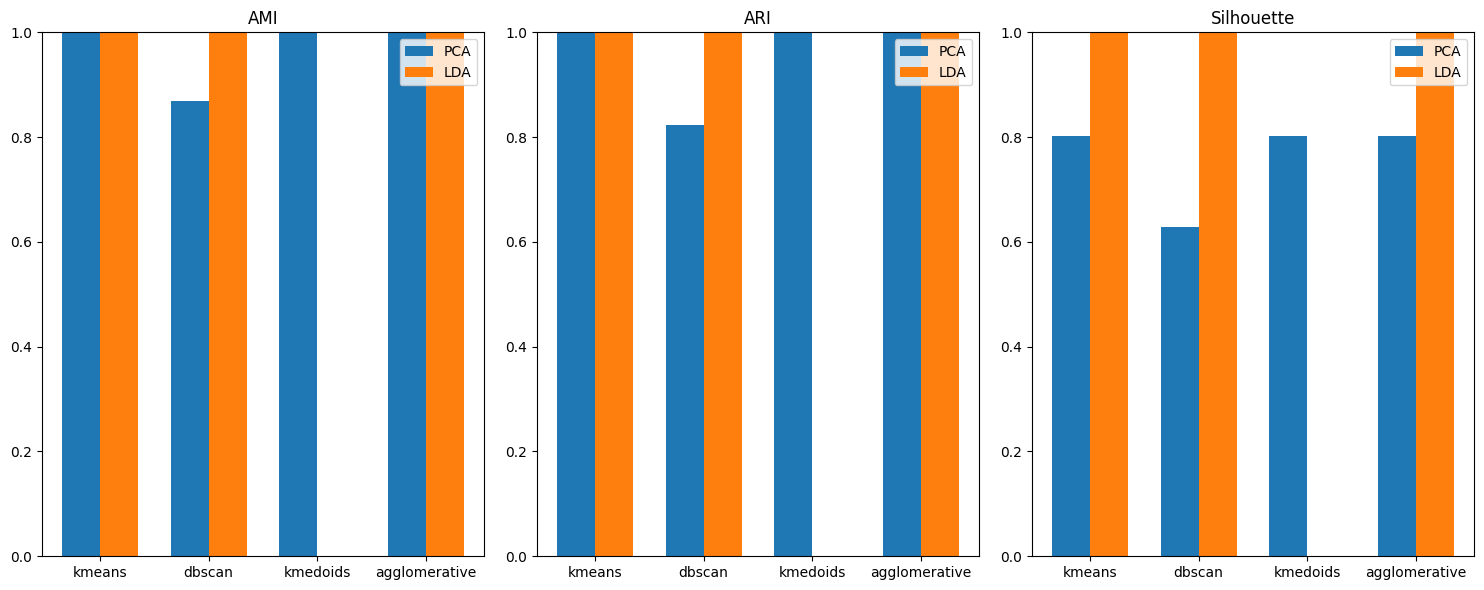

In [45]:
from modules.clustering import Clustering
from modules import util
analyzer = Clustering(df)
results = analyzer.run_analysis()
analyzer.visualize_comparison()


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cl

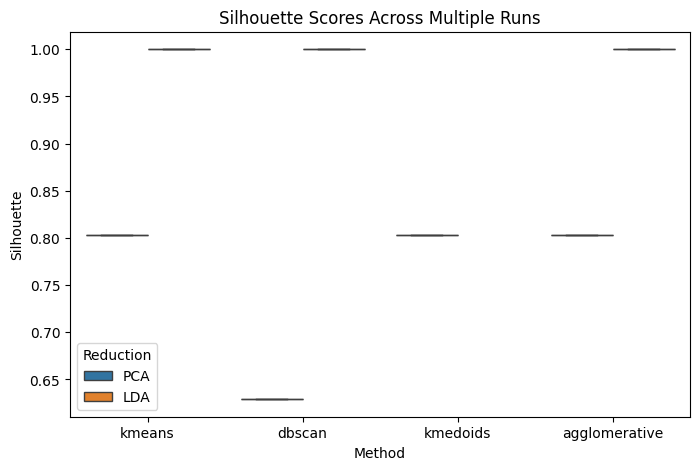

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from modules.clustering import Clustering
N_RUNS = 10  
sil_data = []  

for _ in range(N_RUNS):
    analyzer = Clustering(df)
    results = analyzer.run_analysis()  

    for method, reductions_dict in results.items():
        for reduction, metrics_dict in reductions_dict.items():
            if metrics_dict is not None:
                sil_data.append({
                    "Method": method,
                    "Reduction": reduction,
                    "Silhouette": metrics_dict["Silhouette"]
                })

sil_df = pd.DataFrame(sil_data)

plt.figure(figsize=(8, 5))
sns.boxplot(data=sil_df, x="Method", y="Silhouette", hue="Reduction")
plt.title("Silhouette Scores Across Multiple Runs")
plt.show()
